In [2]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

In [10]:
rng = np.random.RandomState(42)
X_1d = np.linspace(0,10,num=2000)
X = X_1d.reshape(-1,1)
y = X_1d * np.cos(X_1d)+rng.normal(scale=X_1d/3)

In [11]:
print(X_1d)
print(X)
print(y)

[0.00000000e+00 5.00250125e-03 1.00050025e-02 ... 9.98999500e+00
 9.99499750e+00 1.00000000e+01]
[[0.00000000e+00]
 [5.00250125e-03]
 [1.00050025e-02]
 ...
 [9.98999500e+00]
 [9.99499750e+00]
 [1.00000000e+01]]
[ 0.00000000e+00  4.77188288e-03  1.21645436e-02 ... -1.13729159e+01
 -8.95689847e+00 -1.08737241e+01]


In [14]:
quantiles = [0.95, 0.2, 0.05]
parameters = dict(loss="quantile",max_bins=32,max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

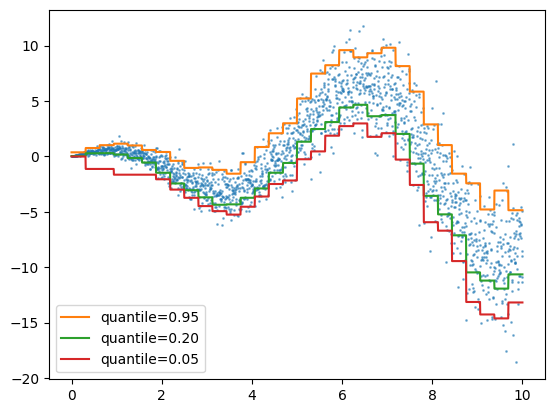

In [15]:
fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")